# Assignment 3 - Keras and CNN

# CNN on MNIST with Keras

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

11490434/11490434 [==============================] - 0s 0us/step
5


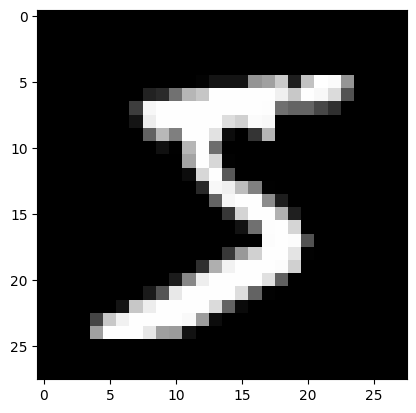

In [2]:
# load data
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print(train_labels[0])
plt.imshow(train_images[0], cmap="Greys_r")

In [3]:
# data is not reshaped to 784 anymore, but 28x28x1
# the 1 color channel!! this is important
train_data = tf.data.Dataset.from_tensor_slices(
    (train_images.reshape([-1, 28, 28, 1]).astype(np.float32) / 255, train_labels.astype(np.int32)))
train_data = train_data.shuffle(buffer_size=60000).batch(128).repeat()

test_data = tf.data.Dataset.from_tensor_slices(
    (test_images.reshape([-1, 28, 28, 1]).astype(np.float32) / 255, test_labels.astype(np.int32))).batch(128)

In [4]:
train_steps = 2000

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters = 32, kernel_size=(3, 3), padding = "same", activation=tf.nn.relu, name = "conv_1", input_shape = (28, 28, 1)),
    tf.keras.layers.Conv2D(filters = 64, kernel_size=(3, 3), padding = "same", activation=tf.nn.relu, name = "conv_2"),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), name="maxpool_1"),
    tf.keras.layers.Conv2D(filters = 128, kernel_size=(3, 3), padding = "same", activation=tf.nn.relu, name = "conv_3"),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), name="maxpool_2"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10)
])

# Adam makes things much smoother
optimizer = tf.optimizers.Adam()
# from_logits = True!! #neverforget
loss_fn = tf.losses.SparseCategoricalCrossentropy(from_logits=True)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_1 (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 conv_2 (Conv2D)             (None, 28, 28, 64)        18496     
                                                                 
 maxpool_1 (MaxPooling2D)    (None, 14, 14, 64)        0         
                                                                 
 conv_3 (Conv2D)             (None, 14, 14, 128)       73856     
                                                                 
 maxpool_2 (MaxPooling2D)    (None, 7, 7, 128)         0         
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)               8

In [5]:
train_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()

for step, (image_batch, label_batch) in enumerate(train_data):
    if step > train_steps:
        break

    with tf.GradientTape() as tape:
        logits = model(image_batch)
        # loss format is generally: first argument targets, second argument outputs
        loss = loss_fn(label_batch, logits)

    # if you didn't build the model, it is important that you get the variables
    # AFTER the model has been called the first time
    variables = model.trainable_variables
    gradients = tape.gradient(loss, variables)

    optimizer.apply_gradients(zip(gradients, variables))

    train_acc_metric(label_batch, logits)

    if not step % 100:
        # this is different from before. there, we only evaluated accuracy
        # for one batch. Now, we always average over 100 batches
        print("Loss: {} Accuracy: {}".format(loss, train_acc_metric.result()))
        train_acc_metric.reset_states()

Loss: 2.30788254737854 Accuracy: 0.0859375
Loss: 0.12049482017755508 Accuracy: 0.8804687261581421
Loss: 0.08594903349876404 Accuracy: 0.9673437476158142
Loss: 0.03273867815732956 Accuracy: 0.9779687523841858
Loss: 0.08172497153282166 Accuracy: 0.979296863079071
Loss: 0.039994750171899796 Accuracy: 0.9844141602516174
Loss: 0.034519489854574203 Accuracy: 0.9882031083106995
Loss: 0.09444170445203781 Accuracy: 0.9867968559265137
Loss: 0.03244532272219658 Accuracy: 0.9879687428474426
Loss: 0.010296731255948544 Accuracy: 0.9879687428474426
Loss: 0.018515627831220627 Accuracy: 0.9906798005104065
Loss: 0.020319871604442596 Accuracy: 0.9912499785423279
Loss: 0.017893966287374496 Accuracy: 0.9903905987739563
Loss: 0.03626560419797897 Accuracy: 0.9903125166893005
Loss: 0.021994851529598236 Accuracy: 0.9925781488418579
Loss: 0.01656433939933777 Accuracy: 0.9956140518188477
Loss: 0.007998624816536903 Accuracy: 0.9939062595367432
Loss: 0.014338366687297821 Accuracy: 0.9934375286102295
Loss: 0.014589

In [6]:
test_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()
for image_batch, label_batch in test_data:
    test_acc_metric(label_batch, model(image_batch))
print("Test acc: {}".format(test_acc_metric.result()))

Test acc: 0.9922000169754028


# CNN on Fashion-MNIST with Keras

4422102/4422102 [==============================] - 0s 0us/step
9


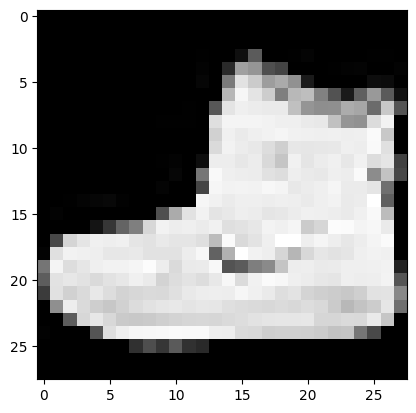

In [7]:
# load data
fmnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fmnist.load_data()

print(train_labels[0])
plt.imshow(train_images[0], cmap="Greys_r")

In [8]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [9]:
# data is not reshaped to 784 anymore, but 28x28x1
# the 1 color channel!! this is important
train_data = tf.data.Dataset.from_tensor_slices(
    (train_images.reshape([-1, 28, 28, 1]).astype(np.float32) / 255, train_labels.astype(np.int32)))
train_data = train_data.shuffle(buffer_size=60000).batch(128).repeat()

test_data = tf.data.Dataset.from_tensor_slices(
    (test_images.reshape([-1, 28, 28, 1]).astype(np.float32) / 255, test_labels.astype(np.int32))).batch(128)

In [10]:
train_steps = 2000

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters = 32, kernel_size=(3, 3), padding = "same", activation=tf.nn.relu, name = "conv_1", input_shape = (28, 28, 1)),
    tf.keras.layers.Conv2D(filters = 64, kernel_size=(3, 3), padding = "same", activation=tf.nn.relu, name = "conv_2"),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), name="maxpool_1"),
    tf.keras.layers.Conv2D(filters = 128, kernel_size=(3, 3), padding = "same", activation=tf.nn.relu, name = "conv_3"),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), name="maxpool_2"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10)
])

# Adam makes things much smoother
optimizer = tf.optimizers.Adam()
# from_logits = True!! #neverforget
loss_fn = tf.losses.SparseCategoricalCrossentropy(from_logits=True)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_1 (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 conv_2 (Conv2D)             (None, 28, 28, 64)        18496     
                                                                 
 maxpool_1 (MaxPooling2D)    (None, 14, 14, 64)        0         
                                                                 
 conv_3 (Conv2D)             (None, 14, 14, 128)       73856     
                                                                 
 maxpool_2 (MaxPooling2D)    (None, 7, 7, 128)         0         
                                                                 
 flatten_1 (Flatten)         (None, 6272)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [11]:
train_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()

for step, (image_batch, label_batch) in enumerate(train_data):
    if step > train_steps:
        break

    with tf.GradientTape() as tape:
        logits = model(image_batch)
        # loss format is generally: first argument targets, second argument outputs
        loss = loss_fn(label_batch, logits)

    # if you didn't build the model, it is important that you get the variables
    # AFTER the model has been called the first time
    variables = model.trainable_variables
    gradients = tape.gradient(loss, variables)

    optimizer.apply_gradients(zip(gradients, variables))

    train_acc_metric(label_batch, logits)

    if not step % 100:
        # this is different from before. there, we only evaluated accuracy
        # for one batch. Now, we always average over 100 batches
        print("Loss: {} Accuracy: {}".format(loss, train_acc_metric.result()))
        train_acc_metric.reset_states()

Loss: 2.299467086791992 Accuracy: 0.140625
Loss: 0.49667584896087646 Accuracy: 0.757031261920929
Loss: 0.4230605363845825 Accuracy: 0.8573437333106995
Loss: 0.2995346784591675 Accuracy: 0.8726562261581421
Loss: 0.3138021230697632 Accuracy: 0.8875781297683716
Loss: 0.29194939136505127 Accuracy: 0.8968514800071716
Loss: 0.2453336864709854 Accuracy: 0.9055469036102295
Loss: 0.27008959650993347 Accuracy: 0.907421886920929
Loss: 0.2730228304862976 Accuracy: 0.9129687547683716
Loss: 0.22978344559669495 Accuracy: 0.9139843583106995
Loss: 0.1812775582075119 Accuracy: 0.9244987368583679
Loss: 0.19839775562286377 Accuracy: 0.9216406345367432
Loss: 0.16981813311576843 Accuracy: 0.9253125190734863
Loss: 0.23413342237472534 Accuracy: 0.9311718940734863
Loss: 0.19653330743312836 Accuracy: 0.9271875023841858
Loss: 0.22894348204135895 Accuracy: 0.9384398460388184
Loss: 0.15766581892967224 Accuracy: 0.9371093511581421
Loss: 0.10780102759599686 Accuracy: 0.9389843940734863
Loss: 0.26365038752555847 Accu

In [12]:
test_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()
for image_batch, label_batch in test_data:
    test_acc_metric(label_batch, model(image_batch))
print("Test acc: {}".format(test_acc_metric.result()))

Test acc: 0.9214000105857849


# CNN on CIFAR-10

170498071/170498071 [==============================] - 5s 0us/step
[6]


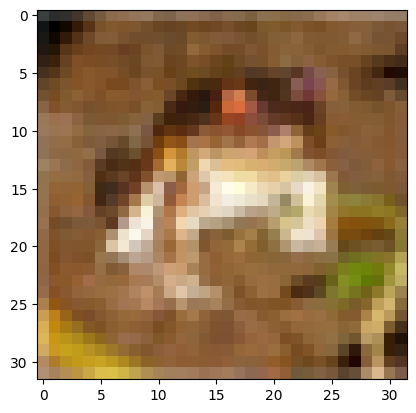

In [13]:
cifar = tf.keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = cifar.load_data()

print(train_labels[0])
plt.imshow(train_images[0], cmap="Greys_r")

In [14]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [16]:
train_data = tf.data.Dataset.from_tensor_slices(
    (train_images.reshape([-1, 32, 32, 3]).astype(np.float32) / 255, train_labels.astype(np.int32)))
train_data = train_data.shuffle(buffer_size=60000).batch(128).repeat()

test_data = tf.data.Dataset.from_tensor_slices(
    (test_images.reshape([-1, 32, 32, 3]).astype(np.float32) / 255, test_labels.astype(np.int32))).batch(128)

## Basic Setting

In [21]:
train_steps = 2000

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters = 32, kernel_size=(3, 3), padding = "same", activation=tf.nn.relu, name = "conv_1", input_shape = (32, 32, 3)),
    tf.keras.layers.Conv2D(filters = 64, kernel_size=(3, 3), padding = "same", activation=tf.nn.relu, name = "conv_2"),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), name="maxpool_1"),
    tf.keras.layers.Conv2D(filters = 128, kernel_size=(3, 3), padding = "same", activation=tf.nn.relu, name = "conv_3"),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), name="maxpool_2"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10)
])

# Adam makes things much smoother
optimizer = tf.optimizers.Adam()
# from_logits = True!! #neverforget
loss_fn = tf.losses.SparseCategoricalCrossentropy(from_logits=True)

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_1 (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv_2 (Conv2D)             (None, 32, 32, 64)        18496     
                                                                 
 maxpool_1 (MaxPooling2D)    (None, 16, 16, 64)        0         
                                                                 
 conv_3 (Conv2D)             (None, 16, 16, 128)       73856     
                                                                 
 maxpool_2 (MaxPooling2D)    (None, 8, 8, 128)         0         
                                                                 
 flatten_3 (Flatten)         (None, 8192)              0         
                                                                 
 dense_6 (Dense)             (None, 128)              

In [18]:
train_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()

for step, (image_batch, label_batch) in enumerate(train_data):
    if step > train_steps:
        break

    with tf.GradientTape() as tape:
        logits = model(image_batch)
        # loss format is generally: first argument targets, second argument outputs
        loss = loss_fn(label_batch, logits)

    # if you didn't build the model, it is important that you get the variables
    # AFTER the model has been called the first time
    variables = model.trainable_variables
    gradients = tape.gradient(loss, variables)

    optimizer.apply_gradients(zip(gradients, variables))

    train_acc_metric(label_batch, logits)

    if not step % 100:
        # this is different from before. there, we only evaluated accuracy
        # for one batch. Now, we always average over 100 batches
        print("Loss: {} Accuracy: {}".format(loss, train_acc_metric.result()))
        train_acc_metric.reset_states()

Loss: 2.313772201538086 Accuracy: 0.0625
Loss: 1.6119433641433716 Accuracy: 0.36265623569488525
Loss: 1.2534593343734741 Accuracy: 0.49937498569488525
Loss: 1.0956857204437256 Accuracy: 0.560546875
Loss: 0.9528722763061523 Accuracy: 0.6176286339759827
Loss: 0.8539584279060364 Accuracy: 0.6560156345367432
Loss: 0.9738563299179077 Accuracy: 0.6673437356948853
Loss: 0.8881906867027283 Accuracy: 0.6867969036102295
Loss: 0.937796413898468 Accuracy: 0.7085162997245789
Loss: 0.7728348970413208 Accuracy: 0.7258594036102295
Loss: 0.5797577500343323 Accuracy: 0.7264062762260437
Loss: 0.9365914463996887 Accuracy: 0.733203113079071
Loss: 0.7955054044723511 Accuracy: 0.7372961044311523
Loss: 0.6278781294822693 Accuracy: 0.7642187476158142
Loss: 0.799414873123169 Accuracy: 0.7649999856948853
Loss: 0.6722870469093323 Accuracy: 0.7702343463897705
Loss: 0.4305873215198517 Accuracy: 0.7819165587425232
Loss: 0.39597874879837036 Accuracy: 0.7997656464576721
Loss: 0.5812735557556152 Accuracy: 0.79945313930

In [19]:
test_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()
for image_batch, label_batch in test_data:
    test_acc_metric(label_batch, model(image_batch))
print("Test acc: {}".format(test_acc_metric.result()))

Test acc: 0.751800000667572


## Increased Epochs

In [20]:
epochs = 2
for i in range(epochs):
  print("Epoch {}".format(i))
  for step, (image_batch, label_batch) in enumerate(train_data):
      if step > train_steps:
          break

      with tf.GradientTape() as tape:
          logits = model(image_batch)
          # loss format is generally: first argument targets, second argument outputs
          loss = loss_fn(label_batch, logits)

      # if you didn't build the model, it is important that you get the variables
      # AFTER the model has been called the first time
      variables = model.trainable_variables
      gradients = tape.gradient(loss, variables)

      optimizer.apply_gradients(zip(gradients, variables))

      train_acc_metric(label_batch, logits)

      if not step % 100:
          # this is different from before. there, we only evaluated accuracy
          # for one batch. Now, we always average over 100 batches
          print("Loss: {} Accuracy: {}".format(loss, train_acc_metric.result()))
          train_acc_metric.reset_states()

Epoch 0
Loss: 0.3578989803791046 Accuracy: 0.8984375
Loss: 0.4886166751384735 Accuracy: 0.8423437476158142
Loss: 0.4636472761631012 Accuracy: 0.8324999809265137
Loss: 0.47139206528663635 Accuracy: 0.8296874761581421
Loss: 0.42572832107543945 Accuracy: 0.8281053900718689
Loss: 0.4382883608341217 Accuracy: 0.8716406226158142
Loss: 0.5605603456497192 Accuracy: 0.8676562309265137
Loss: 0.4501621723175049 Accuracy: 0.8589843511581421
Loss: 0.23769456148147583 Accuracy: 0.8711574673652649
Loss: 0.33114784955978394 Accuracy: 0.9032031297683716
Loss: 0.3298453986644745 Accuracy: 0.8897656202316284
Loss: 0.3463050425052643 Accuracy: 0.8881250023841858
Loss: 0.16716229915618896 Accuracy: 0.8980551958084106
Loss: 0.27601245045661926 Accuracy: 0.9264062643051147
Loss: 0.21654155850410461 Accuracy: 0.9120312333106995
Loss: 0.20400181412696838 Accuracy: 0.9096875190734863
Loss: 0.24001379311084747 Accuracy: 0.9252666234970093
Loss: 0.08595672994852066 Accuracy: 0.949999988079071
Loss: 0.208769977092

## Adjusting Filter size

In [22]:
train_steps = 2000

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters = 64, kernel_size=(3, 3), padding = "same", activation=tf.nn.relu, name = "conv_1", input_shape = (32, 32, 3)),
    tf.keras.layers.Conv2D(filters = 128, kernel_size=(3, 3), padding = "same", activation=tf.nn.relu, name = "conv_2"),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), name="maxpool_1"),
    tf.keras.layers.Conv2D(filters = 128, kernel_size=(3, 3), padding = "same", activation=tf.nn.relu, name = "conv_3"),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), name="maxpool_2"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10)
])

# Adam makes things much smoother
optimizer = tf.optimizers.Adam()
# from_logits = True!! #neverforget
loss_fn = tf.losses.SparseCategoricalCrossentropy(from_logits=True)

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_1 (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 conv_2 (Conv2D)             (None, 32, 32, 128)       73856     
                                                                 
 maxpool_1 (MaxPooling2D)    (None, 16, 16, 128)       0         
                                                                 
 conv_3 (Conv2D)             (None, 16, 16, 128)       147584    
                                                                 
 maxpool_2 (MaxPooling2D)    (None, 8, 8, 128)         0         
                                                                 
 flatten_4 (Flatten)         (None, 8192)              0         
                                                                 
 dense_8 (Dense)             (None, 128)              

In [23]:
train_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()

for step, (image_batch, label_batch) in enumerate(train_data):
    if step > train_steps:
        break

    with tf.GradientTape() as tape:
        logits = model(image_batch)
        # loss format is generally: first argument targets, second argument outputs
        loss = loss_fn(label_batch, logits)

    # if you didn't build the model, it is important that you get the variables
    # AFTER the model has been called the first time
    variables = model.trainable_variables
    gradients = tape.gradient(loss, variables)

    optimizer.apply_gradients(zip(gradients, variables))

    train_acc_metric(label_batch, logits)

    if not step % 100:
        # this is different from before. there, we only evaluated accuracy
        # for one batch. Now, we always average over 100 batches
        print("Loss: {} Accuracy: {}".format(loss, train_acc_metric.result()))
        train_acc_metric.reset_states()

Loss: 2.300408363342285 Accuracy: 0.140625
Loss: 1.4709084033966064 Accuracy: 0.34281250834465027
Loss: 1.3278982639312744 Accuracy: 0.4861718714237213
Loss: 1.0937402248382568 Accuracy: 0.5553125143051147
Loss: 1.0856468677520752 Accuracy: 0.6079830527305603
Loss: 1.1819185018539429 Accuracy: 0.6517968773841858
Loss: 0.9781569242477417 Accuracy: 0.6773437261581421
Loss: 0.9115937948226929 Accuracy: 0.6922656297683716
Loss: 0.8123372197151184 Accuracy: 0.7002038955688477
Loss: 0.7441233396530151 Accuracy: 0.729687511920929
Loss: 0.7711324691772461 Accuracy: 0.7342968583106995
Loss: 0.8546478748321533 Accuracy: 0.7414844036102295
Loss: 0.546359121799469 Accuracy: 0.7521957159042358
Loss: 0.6250467896461487 Accuracy: 0.770703136920929
Loss: 0.599277138710022 Accuracy: 0.7728124856948853
Loss: 0.6361522674560547 Accuracy: 0.7852343916893005
Loss: 0.4698387682437897 Accuracy: 0.7851317524909973
Loss: 0.46752747893333435 Accuracy: 0.8149999976158142
Loss: 0.5409901738166809 Accuracy: 0.8071

In [24]:
test_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()
for image_batch, label_batch in test_data:
    test_acc_metric(label_batch, model(image_batch))
print("Test acc: {}".format(test_acc_metric.result()))

Test acc: 0.748199999332428


## Changed Kernel size

In [25]:
train_steps = 2000

# Kernel size increased to 5 x 5

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters = 64, kernel_size=(5, 5), padding = "same", activation=tf.nn.relu, name = "conv_1", input_shape = (32, 32, 3)),
    tf.keras.layers.Conv2D(filters = 128, kernel_size=(5, 5), padding = "same", activation=tf.nn.relu, name = "conv_2"),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), name="maxpool_1"),
    tf.keras.layers.Conv2D(filters = 128, kernel_size=(5, 5), padding = "same", activation=tf.nn.relu, name = "conv_3"),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), name="maxpool_2"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10)
])

# Adam makes things much smoother
optimizer = tf.optimizers.Adam()
# from_logits = True!! #neverforget
loss_fn = tf.losses.SparseCategoricalCrossentropy(from_logits=True)

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_1 (Conv2D)             (None, 32, 32, 64)        4864      
                                                                 
 conv_2 (Conv2D)             (None, 32, 32, 128)       204928    
                                                                 
 maxpool_1 (MaxPooling2D)    (None, 16, 16, 128)       0         
                                                                 
 conv_3 (Conv2D)             (None, 16, 16, 128)       409728    
                                                                 
 maxpool_2 (MaxPooling2D)    (None, 8, 8, 128)         0         
                                                                 
 flatten_5 (Flatten)         (None, 8192)              0         
                                                                 
 dense_10 (Dense)            (None, 128)              

In [26]:
train_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()

for step, (image_batch, label_batch) in enumerate(train_data):
    if step > train_steps:
        break

    with tf.GradientTape() as tape:
        logits = model(image_batch)
        # loss format is generally: first argument targets, second argument outputs
        loss = loss_fn(label_batch, logits)

    # if you didn't build the model, it is important that you get the variables
    # AFTER the model has been called the first time
    variables = model.trainable_variables
    gradients = tape.gradient(loss, variables)

    optimizer.apply_gradients(zip(gradients, variables))

    train_acc_metric(label_batch, logits)

    if not step % 100:
        # this is different from before. there, we only evaluated accuracy
        # for one batch. Now, we always average over 100 batches
        print("Loss: {} Accuracy: {}".format(loss, train_acc_metric.result()))
        train_acc_metric.reset_states()

Loss: 2.308818817138672 Accuracy: 0.0859375
Loss: 1.8100690841674805 Accuracy: 0.29554688930511475
Loss: 1.3825974464416504 Accuracy: 0.4495312571525574
Loss: 1.3755528926849365 Accuracy: 0.516796886920929
Loss: 1.027834177017212 Accuracy: 0.5659504532814026
Loss: 1.2016741037368774 Accuracy: 0.6012499928474426
Loss: 1.011459231376648 Accuracy: 0.6318749785423279
Loss: 0.9258040189743042 Accuracy: 0.6460156440734863
Loss: 0.8408719301223755 Accuracy: 0.6685225963592529
Loss: 0.8174552321434021 Accuracy: 0.7033593654632568
Loss: 0.8387763500213623 Accuracy: 0.7028124928474426
Loss: 0.6923415064811707 Accuracy: 0.7178124785423279
Loss: 0.5332013368606567 Accuracy: 0.731179416179657
Loss: 0.547999918460846 Accuracy: 0.762499988079071
Loss: 0.9510667324066162 Accuracy: 0.758984386920929
Loss: 0.6264247894287109 Accuracy: 0.7576562762260437
Loss: 0.4403444230556488 Accuracy: 0.7814460396766663
Loss: 0.5265405178070068 Accuracy: 0.8071093559265137
Loss: 0.6505845785140991 Accuracy: 0.8076562

In [27]:
test_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()
for image_batch, label_batch in test_data:
    test_acc_metric(label_batch, model(image_batch))
print("Test acc: {}".format(test_acc_metric.result()))

Test acc: 0.7354999780654907


In [28]:
train_steps = 2000

# Kernel size increased to 15 x 15

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters = 64, kernel_size=(15, 15), padding = "same", activation=tf.nn.relu, name = "conv_1", input_shape = (32, 32, 3)),
    tf.keras.layers.Conv2D(filters = 128, kernel_size=(15, 15), padding = "same", activation=tf.nn.relu, name = "conv_2"),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), name="maxpool_1"),
    tf.keras.layers.Conv2D(filters = 128, kernel_size=(15, 15), padding = "same", activation=tf.nn.relu, name = "conv_3"),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), name="maxpool_2"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10)
])

# Adam makes things much smoother
optimizer = tf.optimizers.Adam()
# from_logits = True!! #neverforget
loss_fn = tf.losses.SparseCategoricalCrossentropy(from_logits=True)

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_1 (Conv2D)             (None, 32, 32, 64)        43264     
                                                                 
 conv_2 (Conv2D)             (None, 32, 32, 128)       1843328   
                                                                 
 maxpool_1 (MaxPooling2D)    (None, 16, 16, 128)       0         
                                                                 
 conv_3 (Conv2D)             (None, 16, 16, 128)       3686528   
                                                                 
 maxpool_2 (MaxPooling2D)    (None, 8, 8, 128)         0         
                                                                 
 flatten_6 (Flatten)         (None, 8192)              0         
                                                                 
 dense_12 (Dense)            (None, 128)              

In [29]:
train_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()

for step, (image_batch, label_batch) in enumerate(train_data):
    if step > train_steps:
        break

    with tf.GradientTape() as tape:
        logits = model(image_batch)
        # loss format is generally: first argument targets, second argument outputs
        loss = loss_fn(label_batch, logits)

    # if you didn't build the model, it is important that you get the variables
    # AFTER the model has been called the first time
    variables = model.trainable_variables
    gradients = tape.gradient(loss, variables)

    optimizer.apply_gradients(zip(gradients, variables))

    train_acc_metric(label_batch, logits)

    if not step % 100:
        # this is different from before. there, we only evaluated accuracy
        # for one batch. Now, we always average over 100 batches
        print("Loss: {} Accuracy: {}".format(loss, train_acc_metric.result()))
        train_acc_metric.reset_states()

Loss: 2.3044495582580566 Accuracy: 0.09375
Loss: 2.0173513889312744 Accuracy: 0.18640625476837158
Loss: 1.902409553527832 Accuracy: 0.3147656321525574
Loss: 1.6341030597686768 Accuracy: 0.3692968785762787
Loss: 1.518965721130371 Accuracy: 0.4024466872215271
Loss: 1.6444857120513916 Accuracy: 0.42625001072883606
Loss: 1.542420506477356 Accuracy: 0.44148436188697815
Loss: 1.5198781490325928 Accuracy: 0.4642968773841858
Loss: 1.1789462566375732 Accuracy: 0.4933343827724457
Loss: 1.3044432401657104 Accuracy: 0.515625
Loss: 1.250166654586792 Accuracy: 0.5307812690734863
Loss: 1.3082211017608643 Accuracy: 0.520703136920929
Loss: 1.172440528869629 Accuracy: 0.5572459101676941
Loss: 1.2003642320632935 Accuracy: 0.5871875286102295
Loss: 1.009019374847412 Accuracy: 0.5892968773841858
Loss: 1.202378273010254 Accuracy: 0.5887500047683716
Loss: 1.1026885509490967 Accuracy: 0.6188833117485046
Loss: 0.796983540058136 Accuracy: 0.6596875190734863
Loss: 0.9579808115959167 Accuracy: 0.6458593606948853
L

In [30]:
test_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()
for image_batch, label_batch in test_data:
    test_acc_metric(label_batch, model(image_batch))
print("Test acc: {}".format(test_acc_metric.result()))

Test acc: 0.576200008392334


In [31]:
train_steps = 2000

# Kernel size increased to 32 x 32

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters = 64, kernel_size=(32, 32), padding = "same", activation=tf.nn.relu, name = "conv_1", input_shape = (32, 32, 3)),
    tf.keras.layers.Conv2D(filters = 128, kernel_size=(32, 32), padding = "same", activation=tf.nn.relu, name = "conv_2"),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), name="maxpool_1"),
    tf.keras.layers.Conv2D(filters = 128, kernel_size=(32, 32), padding = "same", activation=tf.nn.relu, name = "conv_3"),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), name="maxpool_2"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10)
])

# Adam makes things much smoother
optimizer = tf.optimizers.Adam()
# from_logits = True!! #neverforget
loss_fn = tf.losses.SparseCategoricalCrossentropy(from_logits=True)

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_1 (Conv2D)             (None, 32, 32, 64)        196672    
                                                                 
 conv_2 (Conv2D)             (None, 32, 32, 128)       8388736   
                                                                 
 maxpool_1 (MaxPooling2D)    (None, 16, 16, 128)       0         
                                                                 
 conv_3 (Conv2D)             (None, 16, 16, 128)       16777344  
                                                                 
 maxpool_2 (MaxPooling2D)    (None, 8, 8, 128)         0         
                                                                 
 flatten_7 (Flatten)         (None, 8192)              0         
                                                                 
 dense_14 (Dense)            (None, 128)              

In [32]:
train_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()

for step, (image_batch, label_batch) in enumerate(train_data):
    if step > train_steps:
        break

    with tf.GradientTape() as tape:
        logits = model(image_batch)
        # loss format is generally: first argument targets, second argument outputs
        loss = loss_fn(label_batch, logits)

    # if you didn't build the model, it is important that you get the variables
    # AFTER the model has been called the first time
    variables = model.trainable_variables
    gradients = tape.gradient(loss, variables)

    optimizer.apply_gradients(zip(gradients, variables))

    train_acc_metric(label_batch, logits)

    if not step % 100:
        # this is different from before. there, we only evaluated accuracy
        # for one batch. Now, we always average over 100 batches
        print("Loss: {} Accuracy: {}".format(loss, train_acc_metric.result()))
        train_acc_metric.reset_states()

Loss: 2.3053855895996094 Accuracy: 0.0703125
Loss: 2.3026351928710938 Accuracy: 0.10257812589406967
Loss: 2.3032195568084717 Accuracy: 0.09437499940395355
Loss: 2.302743911743164 Accuracy: 0.09656249731779099
Loss: 2.3021841049194336 Accuracy: 0.0989648699760437
Loss: 2.3013267517089844 Accuracy: 0.10015624761581421
Loss: 2.301849365234375 Accuracy: 0.09523437172174454
Loss: 2.302509069442749 Accuracy: 0.09656249731779099
Loss: 2.302917718887329 Accuracy: 0.09841593354940414
Loss: 2.3031044006347656 Accuracy: 0.10398437827825546
Loss: 2.3029985427856445 Accuracy: 0.09882812201976776
Loss: 2.302980899810791 Accuracy: 0.09648437798023224
Loss: 2.3025848865509033 Accuracy: 0.09778857976198196
Loss: 2.301708936691284 Accuracy: 0.10437499731779099
Loss: 2.3027496337890625 Accuracy: 0.09531249850988388
Loss: 2.303593158721924 Accuracy: 0.09734375029802322
Loss: 2.30147647857666 Accuracy: 0.10100376605987549
Loss: 2.303168296813965 Accuracy: 0.09476562589406967
Loss: 2.3026509284973145 Accura

In [33]:
test_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()
for image_batch, label_batch in test_data:
    test_acc_metric(label_batch, model(image_batch))
print("Test acc: {}".format(test_acc_metric.result()))

Test acc: 0.10000000149011612


In [34]:
train_steps = 2000

# Kernel size decreased to 1 x 1

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters = 64, kernel_size=(1, 1), padding = "same", activation=tf.nn.relu, name = "conv_1", input_shape = (32, 32, 3)),
    tf.keras.layers.Conv2D(filters = 128, kernel_size=(1, 1), padding = "same", activation=tf.nn.relu, name = "conv_2"),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), name="maxpool_1"),
    tf.keras.layers.Conv2D(filters = 128, kernel_size=(1, 1), padding = "same", activation=tf.nn.relu, name = "conv_3"),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), name="maxpool_2"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10)
])

# Adam makes things much smoother
optimizer = tf.optimizers.Adam()
# from_logits = True!! #neverforget
loss_fn = tf.losses.SparseCategoricalCrossentropy(from_logits=True)

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_1 (Conv2D)             (None, 32, 32, 64)        256       
                                                                 
 conv_2 (Conv2D)             (None, 32, 32, 128)       8320      
                                                                 
 maxpool_1 (MaxPooling2D)    (None, 16, 16, 128)       0         
                                                                 
 conv_3 (Conv2D)             (None, 16, 16, 128)       16512     
                                                                 
 maxpool_2 (MaxPooling2D)    (None, 8, 8, 128)         0         
                                                                 
 flatten_8 (Flatten)         (None, 8192)              0         
                                                                 
 dense_16 (Dense)            (None, 128)              

In [35]:
train_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()

for step, (image_batch, label_batch) in enumerate(train_data):
    if step > train_steps:
        break

    with tf.GradientTape() as tape:
        logits = model(image_batch)
        # loss format is generally: first argument targets, second argument outputs
        loss = loss_fn(label_batch, logits)

    # if you didn't build the model, it is important that you get the variables
    # AFTER the model has been called the first time
    variables = model.trainable_variables
    gradients = tape.gradient(loss, variables)

    optimizer.apply_gradients(zip(gradients, variables))

    train_acc_metric(label_batch, logits)

    if not step % 100:
        # this is different from before. there, we only evaluated accuracy
        # for one batch. Now, we always average over 100 batches
        print("Loss: {} Accuracy: {}".format(loss, train_acc_metric.result()))
        train_acc_metric.reset_states()

Loss: 2.2988948822021484 Accuracy: 0.1484375
Loss: 1.54450523853302 Accuracy: 0.3043749928474426
Loss: 1.531832218170166 Accuracy: 0.4344531297683716
Loss: 1.3503397703170776 Accuracy: 0.4694531261920929
Loss: 1.3568260669708252 Accuracy: 0.49631431698799133
Loss: 1.3307772874832153 Accuracy: 0.51953125
Loss: 1.4292387962341309 Accuracy: 0.5212500095367432
Loss: 1.3421077728271484 Accuracy: 0.5385156273841858
Loss: 1.2518442869186401 Accuracy: 0.5476003885269165
Loss: 1.234795093536377 Accuracy: 0.5531250238418579
Loss: 1.2457221746444702 Accuracy: 0.5617969036102295
Loss: 1.2800772190093994 Accuracy: 0.5646874904632568
Loss: 1.110159158706665 Accuracy: 0.5752038955688477
Loss: 1.1757841110229492 Accuracy: 0.586718738079071
Loss: 1.342313289642334 Accuracy: 0.5880468487739563
Loss: 1.3094704151153564 Accuracy: 0.5899999737739563
Loss: 1.1047327518463135 Accuracy: 0.5995922088623047
Loss: 1.193807601928711 Accuracy: 0.5971875190734863
Loss: 1.2508161067962646 Accuracy: 0.602890610694885

In [36]:
test_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()
for image_batch, label_batch in test_data:
    test_acc_metric(label_batch, model(image_batch))
print("Test acc: {}".format(test_acc_metric.result()))

Test acc: 0.5916000008583069


An increased size of filter decreased the model performance drastically. A suitable filter size is 3x3.

## Added Strides

In [38]:
train_steps = 2000

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters = 32, kernel_size=(3, 3), strides=(1, 1), padding = "same", activation=tf.nn.relu, name = "conv_1", input_shape = (32, 32, 3)),
    tf.keras.layers.Conv2D(filters = 64, kernel_size=(3, 3), padding = "same", activation=tf.nn.relu, name = "conv_2"),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), name="maxpool_1"),
    tf.keras.layers.Conv2D(filters = 128, kernel_size=(3, 3), padding = "same", activation=tf.nn.relu, name = "conv_3"),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), name="maxpool_2"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10)
])

# Adam makes things much smoother
optimizer = tf.optimizers.Adam()
# from_logits = True!! #neverforget
loss_fn = tf.losses.SparseCategoricalCrossentropy(from_logits=True)

model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_1 (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv_2 (Conv2D)             (None, 32, 32, 64)        18496     
                                                                 
 maxpool_1 (MaxPooling2D)    (None, 16, 16, 64)        0         
                                                                 
 conv_3 (Conv2D)             (None, 16, 16, 128)       73856     
                                                                 
 maxpool_2 (MaxPooling2D)    (None, 8, 8, 128)         0         
                                                                 
 flatten_9 (Flatten)         (None, 8192)              0         
                                                                 
 dense_18 (Dense)            (None, 128)              

In [39]:
train_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()

for step, (image_batch, label_batch) in enumerate(train_data):
    if step > train_steps:
        break

    with tf.GradientTape() as tape:
        logits = model(image_batch)
        # loss format is generally: first argument targets, second argument outputs
        loss = loss_fn(label_batch, logits)

    # if you didn't build the model, it is important that you get the variables
    # AFTER the model has been called the first time
    variables = model.trainable_variables
    gradients = tape.gradient(loss, variables)

    optimizer.apply_gradients(zip(gradients, variables))

    train_acc_metric(label_batch, logits)

    if not step % 100:
        # this is different from before. there, we only evaluated accuracy
        # for one batch. Now, we always average over 100 batches
        print("Loss: {} Accuracy: {}".format(loss, train_acc_metric.result()))
        train_acc_metric.reset_states()

Loss: 2.3138625621795654 Accuracy: 0.09375
Loss: 1.59475839138031 Accuracy: 0.31421875953674316
Loss: 1.4651634693145752 Accuracy: 0.48265624046325684
Loss: 1.1846867799758911 Accuracy: 0.5353124737739563
Loss: 1.1254279613494873 Accuracy: 0.5810068845748901
Loss: 1.1055731773376465 Accuracy: 0.6310937404632568
Loss: 1.0713804960250854 Accuracy: 0.6449218988418579
Loss: 0.8871496915817261 Accuracy: 0.6717968583106995
Loss: 0.7683706283569336 Accuracy: 0.6821675300598145
Loss: 0.7978931069374084 Accuracy: 0.7138281464576721
Loss: 0.7752179503440857 Accuracy: 0.7250781059265137
Loss: 0.8164147138595581 Accuracy: 0.7196093797683716
Loss: 0.7324307560920715 Accuracy: 0.7398839592933655
Loss: 0.8155431747436523 Accuracy: 0.762890636920929
Loss: 0.6915146112442017 Accuracy: 0.7577343583106995
Loss: 0.5460407733917236 Accuracy: 0.7646874785423279
Loss: 0.5950846076011658 Accuracy: 0.7774466872215271
Loss: 0.4533497095108032 Accuracy: 0.791796863079071
Loss: 0.5426782965660095 Accuracy: 0.7971

In [40]:
test_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()
for image_batch, label_batch in test_data:
    test_acc_metric(label_batch, model(image_batch))
print("Test acc: {}".format(test_acc_metric.result()))

Test acc: 0.7267000079154968


## Dense Layer

In [41]:
train_steps = 2000

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters = 32, kernel_size=(3, 3), padding = "same", activation=tf.nn.relu, name = "conv_1", input_shape = (32, 32, 3)),
    tf.keras.layers.Conv2D(filters = 64, kernel_size=(3, 3), padding = "same", activation=tf.nn.relu, name = "conv_2"),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), name="maxpool_1"),
    tf.keras.layers.Conv2D(filters = 128, kernel_size=(3, 3), padding = "same", activation=tf.nn.relu, name = "conv_3"),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), name="maxpool_2"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(10)
])

# Adam makes things much smoother
optimizer = tf.optimizers.Adam()
# from_logits = True!! #neverforget
loss_fn = tf.losses.SparseCategoricalCrossentropy(from_logits=True)

model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_1 (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv_2 (Conv2D)             (None, 32, 32, 64)        18496     
                                                                 
 maxpool_1 (MaxPooling2D)    (None, 16, 16, 64)        0         
                                                                 
 conv_3 (Conv2D)             (None, 16, 16, 128)       73856     
                                                                 
 maxpool_2 (MaxPooling2D)    (None, 8, 8, 128)         0         
                                                                 
 flatten_10 (Flatten)        (None, 8192)              0         
                                                                 
 dense_20 (Dense)            (None, 512)             

In [42]:
train_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()

for step, (image_batch, label_batch) in enumerate(train_data):
    if step > train_steps:
        break

    with tf.GradientTape() as tape:
        logits = model(image_batch)
        # loss format is generally: first argument targets, second argument outputs
        loss = loss_fn(label_batch, logits)

    # if you didn't build the model, it is important that you get the variables
    # AFTER the model has been called the first time
    variables = model.trainable_variables
    gradients = tape.gradient(loss, variables)

    optimizer.apply_gradients(zip(gradients, variables))

    train_acc_metric(label_batch, logits)

    if not step % 100:
        # this is different from before. there, we only evaluated accuracy
        # for one batch. Now, we always average over 100 batches
        print("Loss: {} Accuracy: {}".format(loss, train_acc_metric.result()))
        train_acc_metric.reset_states()

Loss: 2.2944798469543457 Accuracy: 0.0703125
Loss: 1.5933644771575928 Accuracy: 0.3631249964237213
Loss: 1.408695101737976 Accuracy: 0.5036718845367432
Loss: 1.0107203722000122 Accuracy: 0.5653906464576721
Loss: 0.8589238524436951 Accuracy: 0.6300972104072571
Loss: 0.8569069504737854 Accuracy: 0.662890613079071
Loss: 0.9179462194442749 Accuracy: 0.690234363079071
Loss: 0.8597216606140137 Accuracy: 0.6974999904632568
Loss: 0.7293848991394043 Accuracy: 0.7252979874610901
Loss: 0.7211766242980957 Accuracy: 0.7602343559265137
Loss: 0.710953414440155 Accuracy: 0.7637500166893005
Loss: 0.8530497550964355 Accuracy: 0.7657031416893005
Loss: 0.5289110541343689 Accuracy: 0.7823870778083801
Loss: 0.5081179141998291 Accuracy: 0.8171093463897705
Loss: 0.4137893319129944 Accuracy: 0.8185937404632568
Loss: 0.48029178380966187 Accuracy: 0.8204687237739563
Loss: 0.27291467785835266 Accuracy: 0.840417206287384
Loss: 0.3786478638648987 Accuracy: 0.8726562261581421
Loss: 0.4418076276779175 Accuracy: 0.870

In [43]:
test_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()
for image_batch, label_batch in test_data:
    test_acc_metric(label_batch, model(image_batch))
print("Test acc: {}".format(test_acc_metric.result()))

Test acc: 0.7577000260353088


## Removed Pooling and Added Strides

In [44]:
train_steps = 2000

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters = 32, kernel_size=(3, 3), strides=(1,1), padding = "same", activation=tf.nn.relu, name = "conv_1", input_shape = (32, 32, 3)),
    tf.keras.layers.Conv2D(filters = 64, kernel_size=(3, 3), padding = "same", activation=tf.nn.relu, name = "conv_2"),
    #tf.keras.layers.MaxPool2D(pool_size=(2,2), name="maxpool_1"),
    tf.keras.layers.Conv2D(filters = 128, kernel_size=(3, 3), padding = "same", activation=tf.nn.relu, name = "conv_3"),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), name="maxpool_2"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(10)
])

# Adam makes things much smoother
optimizer = tf.optimizers.Adam()
# from_logits = True!! #neverforget
loss_fn = tf.losses.SparseCategoricalCrossentropy(from_logits=True)

model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_1 (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv_2 (Conv2D)             (None, 32, 32, 64)        18496     
                                                                 
 conv_3 (Conv2D)             (None, 32, 32, 128)       73856     
                                                                 
 maxpool_2 (MaxPooling2D)    (None, 16, 16, 128)       0         
                                                                 
 flatten_11 (Flatten)        (None, 32768)             0         
                                                                 
 dense_22 (Dense)            (None, 512)               16777728  
                                                                 
 dense_23 (Dense)            (None, 10)              

In [45]:
train_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()

for step, (image_batch, label_batch) in enumerate(train_data):
    if step > train_steps:
        break

    with tf.GradientTape() as tape:
        logits = model(image_batch)
        # loss format is generally: first argument targets, second argument outputs
        loss = loss_fn(label_batch, logits)

    # if you didn't build the model, it is important that you get the variables
    # AFTER the model has been called the first time
    variables = model.trainable_variables
    gradients = tape.gradient(loss, variables)

    optimizer.apply_gradients(zip(gradients, variables))

    train_acc_metric(label_batch, logits)

    if not step % 100:
        # this is different from before. there, we only evaluated accuracy
        # for one batch. Now, we always average over 100 batches
        print("Loss: {} Accuracy: {}".format(loss, train_acc_metric.result()))
        train_acc_metric.reset_states()

Loss: 2.307494640350342 Accuracy: 0.109375
Loss: 1.5342551469802856 Accuracy: 0.3225781321525574
Loss: 1.493888258934021 Accuracy: 0.48656249046325684
Loss: 1.1235499382019043 Accuracy: 0.5497656464576721
Loss: 1.137096881866455 Accuracy: 0.600768506526947
Loss: 1.0631974935531616 Accuracy: 0.6458593606948853
Loss: 1.0236141681671143 Accuracy: 0.664843738079071
Loss: 0.9227858781814575 Accuracy: 0.6794531345367432
Loss: 0.6578063368797302 Accuracy: 0.6950282454490662
Loss: 0.8093193173408508 Accuracy: 0.7425000071525574
Loss: 0.611315131187439 Accuracy: 0.756640613079071
Loss: 0.8680576086044312 Accuracy: 0.7477343678474426
Loss: 0.7193264365196228 Accuracy: 0.7698400020599365
Loss: 0.419905424118042 Accuracy: 0.8267187476158142
Loss: 0.5584357380867004 Accuracy: 0.8220312595367432
Loss: 0.5885868668556213 Accuracy: 0.8194531202316284
Loss: 0.21550250053405762 Accuracy: 0.8525721430778503
Loss: 0.2282962054014206 Accuracy: 0.9095312356948853
Loss: 0.4027976393699646 Accuracy: 0.8951562

In [46]:
test_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()
for image_batch, label_batch in test_data:
    test_acc_metric(label_batch, model(image_batch))
print("Test acc: {}".format(test_acc_metric.result()))

Test acc: 0.7077000141143799
